# Especificação da Solução

Vamos desenvolver uma solução que utilize IA para processar informações da Câmara dos Deputados do Brasil, tanto textuais, quanto imagens. A solução possui uma parte offline e online, descritas abaixo:

- **Offline (dataprep.py)**: coleta das informações com as APIs públicas da câmara e execução de atividades com prompts para sumarização, análises e marcação com palavras-chave. Criação de bases vetoriais para referência posterior.
- **Online (dashboard.py)**: visualização das informações coletadas, suas respectivas análises e interfaces com o usuário através de LLMs. 
- **URL base**: 'https://dadosabertos.camara.leg.br/api/v2/'
- **Data referência**: início em 01/08/2024 e fim em 30/08/2024 (datas inclusivas).
- **Plug-and-play**: a solução deve esperar um arquivo .env com a chave Gemini do usuário (o aluno desenvolve com a sua, mas não a exporta para o git!).
- **Faça o upload de todos os arquivos finais** (parquet, json, yaml e png).

## Exercício 1 Arquitetura da Solução

Desenhe a arquitetura da solução com o programa da sua escolha. 

A arquitetura deve indicar os pontos de processamento de informação, LLMs utilizados, bases de dados (parquets, jsons e faiss), arquivos de configuração (yaml), abas do dashboard e suas funcionalidades.
   
   - a. Exporte a arquitetura para o arquivo pdf importado no sistema.
 
   - b. Descreva a arquitetura, explicando seus pontos importantes.
   - c. Descreva o funcionamento de LLMs e como isso pode ser utilizado para atividades de sumarização.

## Exercício 2 Criação de Textos com LLMs

Utilize a sua conta no “poe.com” para gerar um texto curto (2 parágrafos) que explique a Câmara dos Deputados. <br>
Execute o mesmo prompt com 3 LLMs diferentes (claude, gemini e chatgpt) e:
   - a. Explique as vantagens e desvantagens dos três LLMs escolhidos.
   - b. Argumente sobre a diferença entre a resposta dos 3 LLMs.
   - c. Justifique a escolha da resposta final.
   - d. Atualize o prompt do LLM final para gerar um arquivo data/config.yaml com a resposta final (chave: overview_summary).

- Explique as vantagens e desvantagens dos três LLMs escolhidos.
    - O Gemini 1.5 Pro suporta um número muito maior de tokens no prompt de entrada, cerca de 1M, enquanto os demais aceitam cerca de 200 mil. 
    - Para Output, o Gemini 1.5Pro também tem uma capacidade superior, gerando até 8 mil, enquanto o Claude 4 mil e o GPT-4o 2 mil.
    - Dependendo da infraestrutura utilizada pela empresa, pode ser mais vantajoso utilizar o Gemini que é integrado por natureza a toda estrutura do Google Cloud Plataform, ou o GPT, que é abarcado na Azure. 
    - O custo do GPT-4o chega a ser 4x superior ao custo do Gemini 1.5 Pro.
    - No Benchmark entre modelos pode se observar que as notas dos 3 LLMs são muito próximas, com o ranking se intercambiando entre nas diferentes vertentes de avaliação.

    fontes: 
    - https://context.ai/compare/
    - https://artificialanalysis.ai/models?models_selected=gpt-4o-2024-08-06%2Cgemini-1-5-pro%2Cclaude-35-sonnet

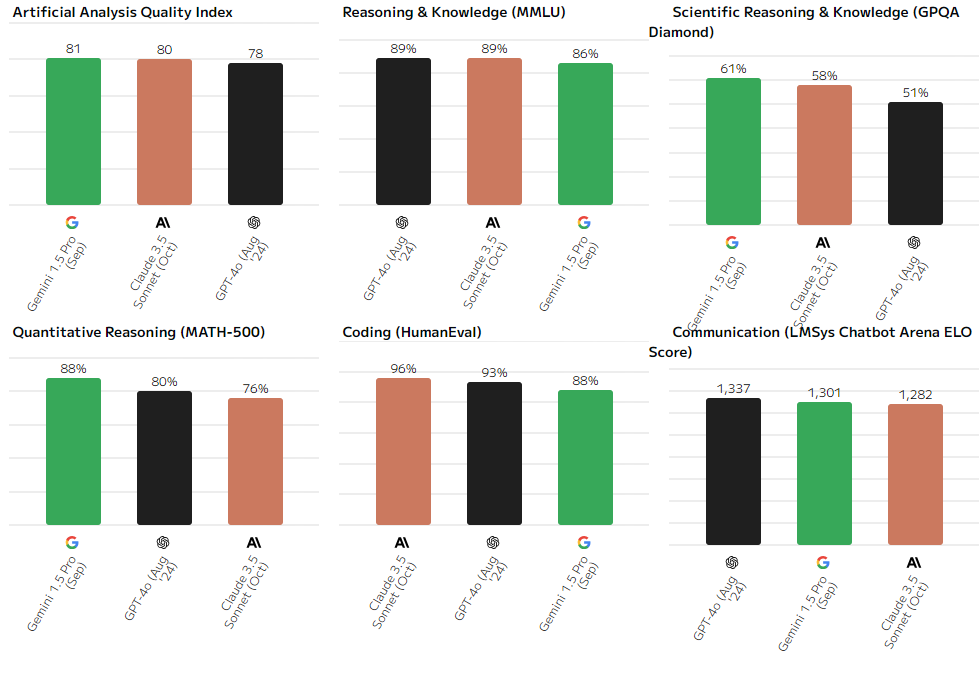

- Argumente sobre a diferença entre a resposta dos 3 LLMs.
    - Os 3 modelos utilizaram basicamente as mesmas informações para contextualizar a Câmara dos Deputados, citando que é composta por 513 deputados, que são eleitos por votos da população e que fiscalizam o poder executivo e criam leis.
        - Apenas o Claude e o Sonnet informaram que a quantidade de deputados para cada estado é proporcional ao tamanho da população.
        - O Claude e o GPT-4o detalharam melhor o funcionamento da Câmara no segundo parágrafo.
        - O Gemini formulou o segundo parágrafo com percepções, usando sentenças como "debates acalorados", "reflexo da diversidade do povo", "busca por soluções para os desafios do país" e "fundamental para a democracia.
        - O GPT-4o explicou sobre a função das comissões permanentes para discutir projetos de leis antes de irem para votação no plenário, e que servem para escutar opniões de especialistas e da sociedade civil.
        - O Claude explicou sobre o sistema de freios e contrapesos, que possibilita instaurar CPIs para sabatinar autoridades, e até mesmo abrir processos administrativos contra o presidente da república.
- Justifique a escolha da resposta final.
    - Selecionada a resposta do Claude, pois abrangiu mais detalhes em um texto de tamanho similar aos demais modelos.
- Atualize o prompt do LLM final para gerar um arquivo data/config.yaml com a resposta final (chave: overview_summary).

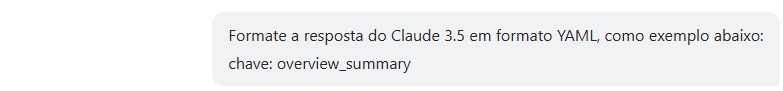
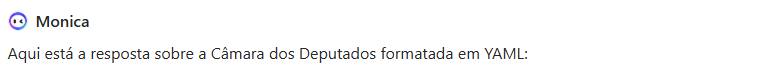
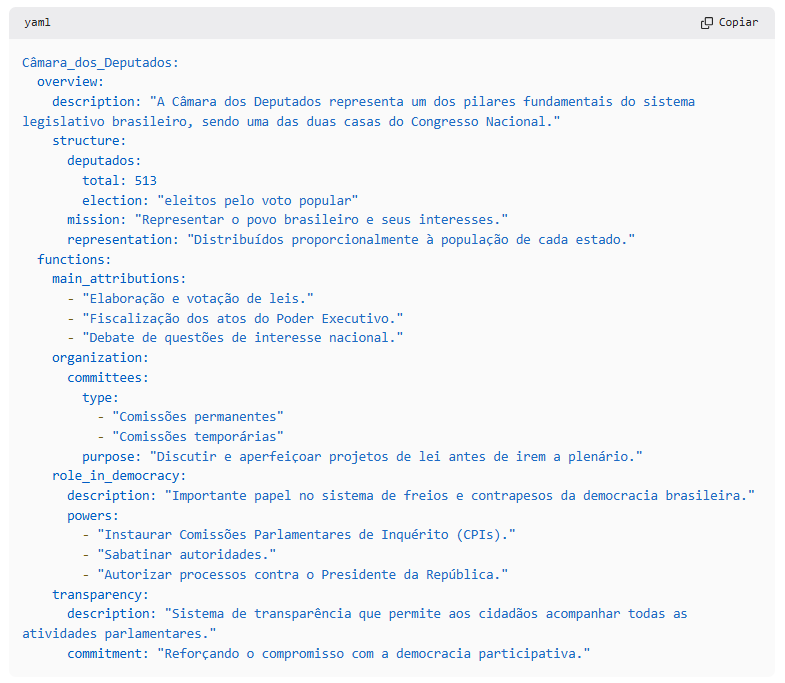

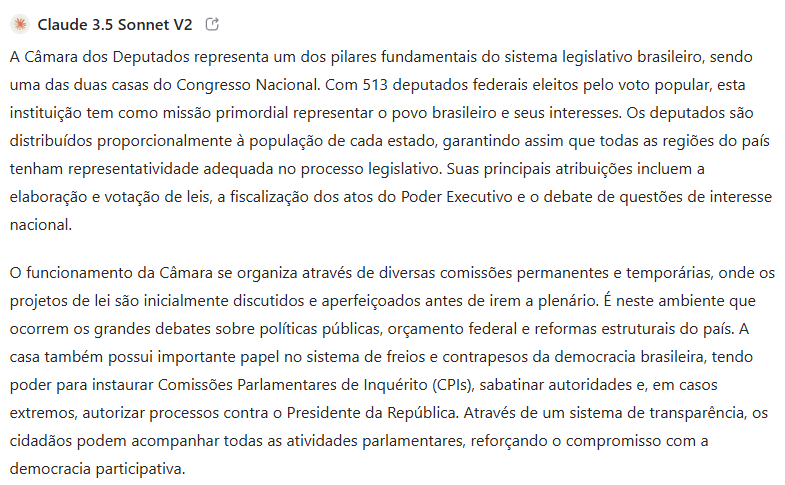

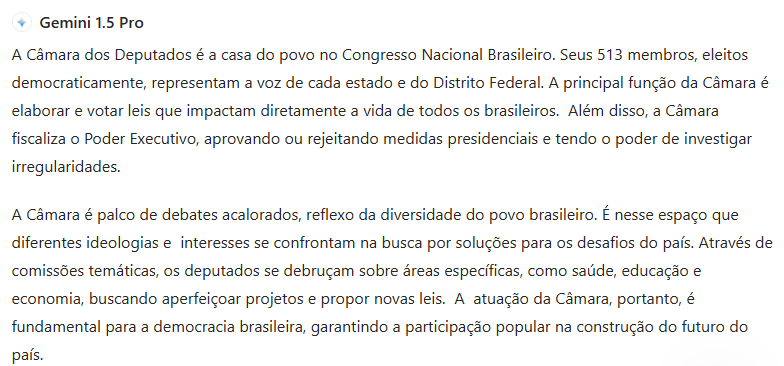

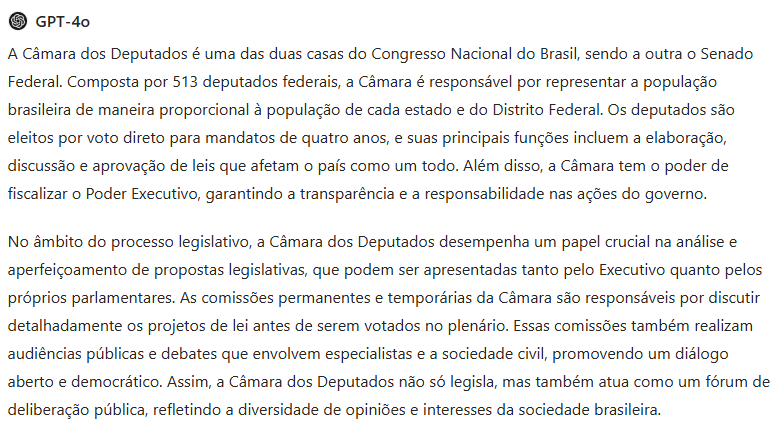

## Exercício 3 Processamento dos dados de deputados

Implemente em dataprep.py uma função que faça a coleta das informações dos deputados atuais da câmara dos deputados:
   - a. Colete e salve os dados dos deputados atuais da câmara no arquivo data/deputados.parquet através da url: url_base+/deputados.
   - b. Executar prompt para criar o código que gere um gráfico de pizza com o total e o percentual de deputados de cada partido, salvo em 'docs/distribuicao_deputados.png'.
   - c. Executar prompt utilizando os resultados da análise anterior (distribuição de deputados por partido) para gerar insights sobre a distribuição de partidos e como isso influencia a câmara. 
      - Utilize os elementos de prompts dados, persona e exemplos para instruir o LLM. 
      - Explique o objetivo de cada elemento, avalie a resposta e salve-a em data/insights_distribuicao_deputados.json.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta
- Explique o objetivo de cada elemento
    - **Dados**: Informações a serem analisadas. Dados fornecidos em formato json com quebra de linha, para melhor compreensão do modelo.
    - **Persona**: "You are a political data analyst". A persona ajusta o estilo e o tom da resposta.
    - **Exemplos**: Foram fornecidos 3 exemplos de insights auxiliar o modelo a gerar respostas consistentes e alinhadas à expectativa.
- Avalie a resposta
    - O modelo gerou uma resposta muito mais completa que os exemplos passados, a intepretação dos valores está correta e conseguiu complementar muito bem com analises sobre como a concentração de poder em certas coligações pode influenciar na aprovação legislativa.

In [13]:
import sys
import os
sys.path.append(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT')
from app.dataprep import *

df = get_deputados()
df.head(2)

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br


In [14]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

path_deputados = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\deputados.parquet"
path_png = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\docs\distribuicao_deputados.png"
path_distribuicao = r"C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\distribuicao_deputados.parquet"

prompt_1 = f"""
You are a python developer, and need to create a script in python to implement the instructions bellow.
You have a parket file in the path {path_deputados}, with the following columns: 

- id: unique identifier of the deputy
- uri: deputy id endpoint
- nome: name of the deputy
- siglaPartido: Party acronym
- uriPartido: Party endpoint
- siglaUf: state acronym
- idLegislatura: legislative period identifier
- urlFoto: deputy photo endpoint
- email: deputy email

Instruction: 
1.Import the file "deputados.parquet" as a DataFrame named df.
2.Calculate the percentage of deputies from each party. 
3.Reset Index and Save the result as a parquet file in the path {path_distribuicao}.
4.Create a pie chart showing the total and distribution of deputies from each party.
5.Save the graphic as a .png file, in the path {path_png}.
6.Add a docstring with description of columns and variables.
7.Output only the code, no need for explanations.
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_1 = model.generate_content(prompt_1)
resp_1 = resp_1.text.replace("```python\n",'').replace("\n```",'')
print(resp_1)

"""
This script analyzes the distribution of deputies by party from a parquet file.

Columns:
    - id: unique identifier of the deputy
    - uri: deputy id endpoint
    - nome: name of the deputy
    - siglaPartido: Party acronym
    - uriPartido: Party endpoint
    - siglaUf: state acronym
    - idLegislatura: legislative period identifier
    - urlFoto: deputy photo endpoint
    - email: deputy email

Variables:
    - df: DataFrame containing the deputy data.
    - distribuicao_partidos: DataFrame showing the percentage of deputies per party.
"""

import pandas as pd
import matplotlib.pyplot as plt

# Load the parquet file into a pandas DataFrame
df = pd.read_parquet(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\deputados.parquet')

# Calculate the percentage of deputies from each party
distribuicao_partidos = df['siglaPartido'].value_counts(normalize=True) * 100
distribuicao_partidos = distribuicao_partidos.reset_index()
distribuicao_partidos.columns = ['Partido', '%

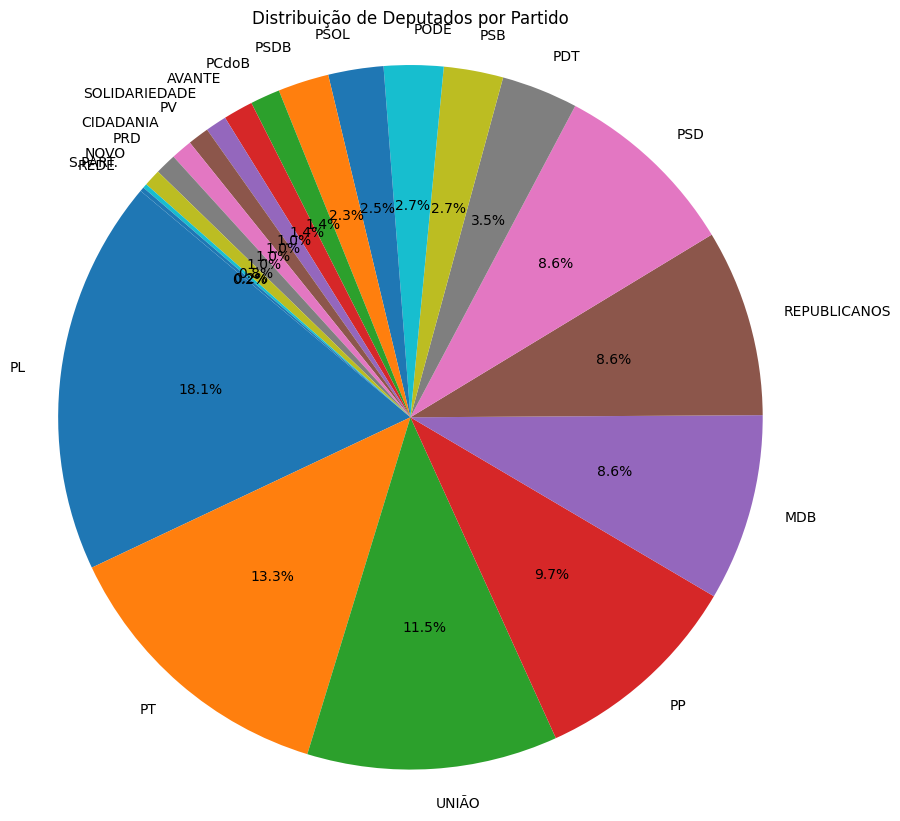

In [15]:
exec(resp_1)

In [16]:
import json

df = pd.read_parquet(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\distribuicao_deputados.parquet')
json_resultado = df.to_json(orient='records', lines=True)

prompt_2 = f"""
### 
{json_resultado}
### 

You are a political data analyst.
Based on the table above, generate insights about the distribution of deputies by party and how this may influence the Chamber of Deputies.

Example of insights:
- The party with the most representatives is the XXX, with YYY deputies.
- The party with the least representatives is the XXX, with YYY deputies.
- 80% of the deputies are from the parties XXX, YYY, ZZZ.
"""

resp_2 = model.generate_content(prompt_2)

data = {"text": resp_2.text}

with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\insights_distribuicao_deputados.json', 'w') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)
    
print(resp_2.text)

Based on the provided data, here are some insights into the distribution of deputies by party and its potential influence on the Chamber of Deputies:

**Dominant Parties:**

* **The PL holds a significant majority:**  The PL possesses the largest share of deputies (18.13%), indicating substantial influence over legislative processes. This considerable lead gives the PL significant power in forming alliances, pushing through its agenda, and potentially blocking opposing legislation.

* **A strong bloc of center-right parties:**  The PL, UNIÃO, PP, MDB, REPUBLICANOS, and PSD together represent a considerable majority of the Chamber (around 60-65%). This coalition would have significant control over the legislative agenda.  Their cooperation would be crucial for the passage of significant legislation.  Internal conflicts within this bloc could however lead to instability.

**Smaller Parties and Coalition Building:**

* **The role of smaller parties:** While individually less powerful, par

## Exercício 4 Processamento dos dados de despesas

Implemente em dataprep.py uma função que colete as informações das despesas dos deputados atuais da câmara dos deputados no período de referência da solução (use a url: url_base+/deputados/{id}/despesas).
   - a. Agrupe os dados de despesas por dia, deputado e tipo de despesa e salve num arquivo parquet (data/serie_despesas_diárias_deputados.parquet).
   - b. Utilizando a técnica de prompt-chaining, crie um prompt que instrua o LLM a gerar um código python que analise os dados das despesas dos deputados. Peça para o LLM até 3 análises. Indique ao LLM quais dados estão disponíveis e o respectivo arquivo (salvo em a)) e execute as análises.
   - c. Utilize os resultados das 3 análises para criar um prompt usando a técnica de Generated Knowledge para instruir o LLM a gerar insights. Salve o resultado como um JSON (data/insights_despesas_deputados.json).

### Argrupando os dados

In [17]:
import sys
import os
sys.path.append(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT')
from app.dataprep import *

df = get_despesas()
df.head(2)

,name,date,expense_type,net_value
0,AJ Albuquerque,2024-08-01,COMBUSTÍVEIS E LUBRIFICANTES.,596.79
1,AJ Albuquerque,2024-08-02,COMBUSTÍVEIS E LUBRIFICANTES.,714.90


### Prompt 1 - Gerar Script Python para Executar as Analises

In [18]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

path_despesas = r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\serie_despesas_diárias_deputados.parquet'

prompt_1 = f"""
You are a data scientist analyzing the spending history of deputies in 2024.
You have a parket file in the path {path_despesas}, with the following columns: 

- name: Deputy name.
- date: Expense occurrence date as a string in the format 'YYYY-MM-DD'.
- expense_type: Classification of the type of expense.
- net_value: Amount of the expense.

Instructions:
1.Implement the 3 analyses described below in Python.
2.Use variables (Analysis1, Analysis2, Analysis3) to store the processed dataframe from each analysis in json format (Parameters: lines=True, force_ascii=False).
3.Use variables (docAnalysis1, docAnalysis2, docAnalysis3) to store the analysis_title of each analysis and the description of the columns in related dataframe
4.Output only the code, no need for explanations.

-Analysis 1:Average Spending per Deputy
-Analysis 2:Total Expense per Type'
-Analysis 3:Total Monthly Spending per Deputy
"""

genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_1)
script = response.text.replace("```python\n",'').replace("\n```",'')
print(script)

import pandas as pd
import json

file_path = r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\serie_despesas_diárias_deputados.parquet'

df = pd.read_parquet(file_path)

#Analysis 1: Average Spending per Deputy
analysis1_df = df.groupby('name')['net_value'].mean().reset_index()
Analysis1 = analysis1_df.to_json(orient='records', lines=True, force_ascii=False)
docAnalysis1 = {
    'analysis_title': 'Average Spending per Deputy',
    'columns': {
        'name': 'Deputy Name',
        'net_value': 'Average Spending'
    }
}


#Analysis 2: Total Expense per Type
analysis2_df = df.groupby('expense_type')['net_value'].sum().reset_index()
Analysis2 = analysis2_df.to_json(orient='records', lines=True, force_ascii=False)
docAnalysis2 = {
    'analysis_title': 'Total Expense per Type',
    'columns': {
        'expense_type': 'Expense Type',
        'net_value': 'Total Expense'
    }
}

#Analysis 3: Total Monthly Spending per Deputy
df['date'] = pd.to_datetime(df['date'])
df['month']

### Executando o Script

In [19]:
exec(script)

list_docs = [docAnalysis1, docAnalysis2, docAnalysis3]
list_datasets = [Analysis1, Analysis2, Analysis3]

### Prompt 2  - Detalha os insights que precisam ser obtidos, já considerando os campos disponíveis

In [20]:
results = []

prompt_2 = f"""
You are a data scientist searching for insights in the spending history of deputies in 2024.

Below are listed 3 analyses and the columns of the available dataframe for each one.
Define 1 insight that can be obtained for each analysis.
The output must be a JSON file with the following structure:

{[
    {'analysis_title': 'title of the analysis',
     'insight': 'The insight that can be obtained from the analysis'
    }
]}

Analyses:
{list_docs}
"""

genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_2)
insights = response.text
insights = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
insights

[{'analysis_title': 'Average Spending per Deputy',
  'insight': 'Identify the deputies with significantly higher or lower average spending compared to their colleagues, potentially indicating areas needing further investigation or commendation.'},
 {'analysis_title': 'Total Expense per Type',
  'insight': 'Determine the expense categories with the highest total spending, allowing for resource allocation prioritization and potential budget optimization strategies.'},
 {'analysis_title': 'Total Monthly Spending per Deputy',
  'insight': 'Detect any unusual spending patterns throughout the year for individual deputies, such as significant spikes or consistent under-spending, which may require closer scrutiny.'}]

### Prompt 3 - Passa os dados para que sejam respondidas as perguntas

In [21]:
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")

results = []
for i, dataset in enumerate(list_datasets):
    prompt_3 = f"""
    Instructions:
    1.Analyze the [DATASET] and try to response: {insights[i]['insight']}.
    2.Add a descriptive response of the data-driven insight to the JSON.
    3.Each response should contain a maximum of 1 paragraph
    4.Dont add the dataset to the JSON file.

    JSON FILE:
    {insights[i]}

    DATASET:
    ###
    {list_datasets[i]}
    ###
    """

    response = model.generate_content(prompt_3)
    insight = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
    results.append(insight)

with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\insights_despesas_deputados.json', 'w') as json_file:
    json.dump(results, json_file, ensure_ascii=False, indent=4)

In [22]:
print(json.dumps(results, indent=4, ensure_ascii=False))

[
    {
        "analysis_title": "Average Spending per Deputy",
        "insight": "Analysis of average deputy spending reveals significant outliers. Deputies Alberto Fraga and Glaustin da Fokus show exceptionally high average spending at 17149.67 and 20394.5 respectively, warranting further investigation into the allocation of resources. Conversely, deputies Carlos Gomes and Fábio Macedo reported negative net values of -1823.82 and -1846.1 respectively, suggesting potential irregularities or accounting errors requiring immediate attention.  Several other deputies exhibited spending considerably above or below the average, also meriting closer scrutiny."
    },
    {
        "analysis_title": "Total Expense per Type",
        "insight": "Determine the expense categories with the highest total spending, allowing for resource allocation prioritization and potential budget optimization strategies.",
        "highest_spending_categories": "Analysis of the provided dataset reveals that \"D

## Exercício 5 Processamento dos dados de proposições

Implemente em dataprep.py uma função que faça a coleta das informações das proposições que tramitam no período de referência (dataInicio e dataFim) e são do tema 'Economia', 'Educação' e 'Ciência, Tecnologia e Inovação' (códigos [40, 46, 62]).
   - a. Coletar um total de 10 proposições por tema e salvar em data/proposicoes_deputados.parquet.
   - b. Utilize a sumarização por chunks para resumir as proposições tramitadas no período de referência. Avalie a resposta e salve-a em data/sumarizacao_proposicoes.json.

In [23]:
import sys
import os
sys.path.append(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT')
from app.dataprep import *
    
df = get_proposicoes()
df.head(2)

,codTema,idProp,texto
0,40,379298,"PROJETO DE LEI COMPLEMENTAR Nº , DE 2..."
0,40,599485,1 \n \n *8B970B3425* \n 8B970B3425 P...


### Criando os Chunks (e tratando os PDFs com o Texto das Propostas)

In [24]:
def criar_chunks(text, window, overlap):
    chunks = []
    for i in range(0, len(text), window - overlap):
        chunk = text[i:i + window] 
        chunks.append(" ".join(chunk))
        if i + window >= len(text):
            break
    return chunks

df_orig = pd.read_parquet(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\proposicoes_deputados.parquet')
df = df_orig.groupby('codTema').head(10)

list_chunksPorProposicao = []
#iterar em cada proposição
for i, row in df.iterrows():
    texto = row['texto'].replace('\n', ' ')
    #retirar espaços duplos
    texto = ' '.join(row['texto'].split())
    list_frases = texto.split('.')
    #remover posições vazias da lista ou que sejam apenas um espaço em branco
    list_frases = [frase for frase in list_frases if frase != '' and frase != ' ']

    #Devido a estrutura do documento, ficaram muitas linhas com apenas um número ou palavra solta. Neste caso, irei juntar com a linha anterior.
    list_frasesNew = []

    for i in range(0,len(list_frases)-1):
        if i == 0 or len(list_frases[i].split()) > 3:
            list_frasesNew.append(list_frases[i])
        # Juntar com o item anterior se tiver até 3 palavras.
        else:
            list_frasesNew[-1] += ' ' + list_frases[i]

        chunks = criar_chunks(list_frasesNew, 10, 3)
    
    new_chunk = {'idProp': row['idProp'], 'chunks': chunks}
    list_chunksPorProposicao.append(new_chunk)
    

    print(f"Foram necessários {len(chunks)} chunks para a proposicao '{row['idProp']}'")


Foram necessários 3 chunks para a proposicao '379298'
Foram necessários 7 chunks para a proposicao '599485'
Foram necessários 7 chunks para a proposicao '955550'
Foram necessários 3 chunks para a proposicao '1786192'
Foram necessários 2 chunks para a proposicao '2074942'
Foram necessários 3 chunks para a proposicao '2124303'
Foram necessários 3 chunks para a proposicao '2130732'
Foram necessários 7 chunks para a proposicao '2141516'
Foram necessários 3 chunks para a proposicao '2164554'
Foram necessários 6 chunks para a proposicao '2166831'
Foram necessários 2 chunks para a proposicao '293703'
Foram necessários 3 chunks para a proposicao '307658'
Foram necessários 3 chunks para a proposicao '346189'
Foram necessários 4 chunks para a proposicao '346403'
Foram necessários 2 chunks para a proposicao '347764'
Foram necessários 2 chunks para a proposicao '407963'
Foram necessários 3 chunks para a proposicao '443643'
Foram necessários 2 chunks para a proposicao '465669'
Foram necessários 3 c

In [25]:
list_chunksPorProposicao[0]


{'idProp': 379298,
 'chunks': ['PROJETO DE LEI COMPLEMENTAR Nº , DE 2007 (Do Sr  Vander Loubet) Altera a Lei Complementar nº 101, de 4 de maio de 2000 - Lei de Responsabilidade Fiscal, para suspender temporariamente o pagamento das dívidas, assumidas com a União, dos Municípios que se encontrem em situação de emergência ou em estado de calamidade pública  O Congresso Nacional decreta: Art  1º Esta Lei Complementar visa a alterar a Lei Complementar nº 101, de 4 de maio de 2000 - Lei de Responsabilidade Fiscal, acrescentando-lhe inciso III ao § 3º do art  14 e art  3 4-A, para determinar a suspensão temporária do pagamento das parcelas de dívidas assumidas com a União dos Municípios que se encontrem em situação de emer gência ou em estado de calamidade pública formalmente reconhecidos po r ato do Governo Federal  Art  2º O § 3º do art  14 da Lei Complementar nº 101, de 4 de maio de 2000, passa a vigorar acrescido de inciso III , com a seguinte redação: “III – à suspensão temporária do pa

### Realizando o Resumo de cada Chunk

In [26]:
import os
import google.generativeai as genai
from dotenv import load_dotenv
import time

dict_summaries = {}

prompt = f"""
Você é um reporter político.
Você receberá um trecho de uma proposta legislativa.
Seu objetivo é resumir o texto em uma única sentença.

Trecho da proposta:

"""

genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
model.temperature = 0.3


for proposta in list_chunksPorProposicao:
    chunks = proposta['chunks']
    idProp = proposta['idProp']

    if idProp not in dict_summaries:
        dict_summaries[idProp] = []

    for chunk in chunks:
        response = model.generate_content(prompt + chunk)
        dict_summaries[idProp].append(response.text)

        #Há cota de 15 chamadas por minuto, então tive de adicionar um bom tempo entre chamadas para não exceder.
        time.sleep(4.5)

list(dict_summaries.items())[0]

(379298,
 ['O projeto de lei propõe uma alteração na Lei de Responsabilidade Fiscal para suspender temporariamente o pagamento de dívidas da União por municípios em situação de emergência ou calamidade pública.\n',
  'Esta proposta de lei complementar suspende a cobrança de dívidas federais por municípios brasileiros em situação de emergência ou calamidade pública declarada pelo governo federal, pelo período de vigência da declaração mais 180 dias.\n',
  'A proposta legislativa busca suspender a cobrança de dívidas municipais com a União em situações de emergência ou calamidade, reconhecidas pelo governo federal, alterando a Lei de Responsabilidade Fiscal para permitir a recuperação financeira dos municípios afetados.\n'])

### Condensando os Resumos de cada Chunk em um só por Projeto

In [27]:
df_summaries = pd.DataFrame(columns=['idProp', 'summary'])

prompt = f"""
Você é um reporter político.
Você receberá resumos de trechos de uma proposta legislativas.
Seu objetivo é condensar de em um único texto, as informações mais relevantes da proposta.

Resumos dos trechos:

"""

genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
model.temperature = 0.3


for id in dict_summaries:
    chunks = dict_summaries[id]

    response = model.generate_content(prompt + ' '.join(chunks))
    df_iter = pd.DataFrame({'idProp': idProp, 'summary': response.text}, index=[0])
    df_summaries = pd.concat([df_summaries, pd.DataFrame(df_iter)])
    
    #Há cota de 15 chamadas por minuto, então tive de adicionar um bom tempo entre chamadas para não exceder.
    time.sleep(4.5)

df_summaries.head(2)

,idProp,summary
0,2236291,Projeto de lei em tramitação propõe uma altera...
0,2236291,O deputado Carlos Bezerra propôs um projeto de...


In [ ]:
for i, row in df_summaries.iterrows():
    print(f"Proposta N°{row.idProp}")
    print(f"Resumo: {row.summary}")

df_summaries.to_json(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\data\sumarizacao_proposicoes.json', orient='records', indent=4, force_ascii=False)

Proposta N°2236291
Resumo: Projeto de lei em tramitação propõe uma alteração na Lei de Responsabilidade Fiscal (LRF) para suspender temporariamente o pagamento de dívidas da União por municípios brasileiros em situação de emergência ou calamidade pública, declarada pelo governo federal.  A suspensão abrangeria o período de vigência da declaração de emergência/calamidade mais 180 dias adicionais.  O objetivo é auxiliar na recuperação financeira desses municípios afetados por desastres, permitindo-lhes o direcionamento de recursos para ações de resposta e reconstrução.

Proposta N°2236291
Resumo: O deputado Carlos Bezerra propôs um projeto de lei que altera a Lei nº 5.764/71 (Lei das Sociedades Cooperativas), permitindo que sociedades cooperativas contratem diretores não associados.  A proposta argumenta que essa mudança agiliza a tomada de decisões estratégicas e profissionaliza a gestão, aumentando a competitividade das cooperativas.  A lei, entretanto, manterá a exigência de que os me

## Exercício 6 Dashboards com Chain-of-thoughts

Utilize 3 etapas de Chain-of-Thought prompting para escrever o código inicial do dashboard, destacando as abas Overview, Despesas e Proposições. 
Explique o objetivo de cada prompt na evolução do código até o arquivo dashboard.py final:
   - a. A aba Overview deve possuir um título e descrição da solução de sua escolha.
   - b. O painel deve mostrar o texto sumarizado em config.yaml.
   - c. O painel deve mostrar o gráfico de barras em docs/distribuicao_deputados.png.
   - d. O painel deve mostrar os insights do LLM sobre a distribuição de deputados em data/insights_distribuicao_deputados.json.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Reposta
**Obs:** No exercício 3 havia sido solicitado que o "distribuicao_deputados.png" fosse um gráfico de pizza.
- **Prompt 1:** O Objetivo do primeiro prompt era que o modelo explicasse como criar um aplicativo streamlit com as abas necessárias.
- **Prompt 2:** Teve como objetivo que o modelo explicasse como realizar importações dos tipos de arquivos necessários e como os exibir. Foi passado como forma de contexto o histórico do primeiro prompt e da primeira resposta.
- **Prompt 3:** O objetivo foi executar as instruções das respostas anteriores criando único script. Além do histórico das mensagens anteriores, também foi passado neste prompt os caminhos necessários para cada importação.

### Prompt 1 - Instrução de Criação do APP e Páginas

In [1]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

prompt_1 = """
    Você é um professor universitário ensinando a criar dashboards em Python usando Streamlit e eu sou seu aluno.
    Me instrua a como executar as etapas abaixo, você não deve escrever códigos python, apenas as instruções:
    1.Criar um aplicativo streamlit.
    2.Adicionar três abas: Overview, Despesas e Proposições.
        2.1.Explique porque ocorre o erro  'method' object is not subscriptable quando é utilizado o código abaixo:
        overview_tab = st.tabs(["Overview", "Despesas", "Proposições"])[0] 
        aba.tabs[1]
    3.Adicionar na aba Overview um título "Portal de Governança da Câmara" e a descrição "Este aplicativo visa facilitar a governança da Câmara de Deputados, permitindo o acompanhamento dos políticos com mandatos vigentes, suas despesas e propostas."
    
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_1 = model.generate_content(prompt_1)
resp_1 = resp_1.text
print(resp_1)

c:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Olá, aluno! Vamos construir um dashboard em Streamlit. Siga estas instruções passo a passo:

1. **Criar um aplicativo Streamlit:**  Primeiro, crie um novo arquivo Python (por exemplo, `governo_dashboard.py`).  Certifique-se de ter o Streamlit instalado (`pip install streamlit`).  Este arquivo conterá todo o código do seu dashboard.

2. **Adicionar três abas:**  Usaremos a função `st.tabs` do Streamlit para criar as abas "Overview", "Despesas" e "Proposições".  **Não** use colchetes `[]` para acessar as abas individualmente como no exemplo errado que você forneceu.  A função `st.tabs` retorna um objeto que *não* é uma lista, então você não pode indexá-lo diretamente usando colchetes. O erro `'method' object is not subscriptable` ocorre exatamente por tentar acessar o objeto retornado por `st.tabs` como se fosse uma lista, usando a sintaxe de indexação (`[]`).  A forma correta é usar a função `st.tabs` para criar o grupo de abas, e então utilizar cada aba como um *contexto* dentro de um 

### Prompt 2 - Instrução Sobre Importações

In [2]:
prompt_2 = f"""
    Analise o [HISTÓRICO DE MENSAGENS], onde estão registradas as perguntas que fiz anteriormente e as respostas que você já me passou, e complemente de seguimento respondendo à solicitação no [NOVO PROMPT], você não deve escrever códigos python, apenas fornecer instruções:
    
    MENSAGENS ANTERIORES:
        1° PROMPT:{prompt_1} 

        1° REPOSTA: {resp_1}

    NOVO PROMPT:
    1.Explique como importar um arquivo do tipo .yaml e exibir o conteúdo na interface streamlit.
        1.1 - Como exibir o arquivo "config.yaml" como uma string com quebras de linha, em uma área com altura=500.
    2.Explique como importar uma imagem local e exibi-la na interface streamlit.
    3.Explique como importar um arquivo .json e exibir o conteúdo na interface streamlit.
        3.2 - Como exibir o arquivo "insights_distribuicao_deputados.json". Sabendo que é um json com um único campo "text" que contém uma string já formatada como markdown.
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_2 = model.generate_content(prompt_2)
resp_2 = resp_2.text
print(resp_2)

1. **Importar e exibir arquivo YAML:**

   1. **Importação:**  Utilize a biblioteca `PyYAML`. Instale-a se necessário (`pip install pyyaml`).  Em seu script Streamlit, importe-a com `import yaml`.  Abra o arquivo YAML usando `with open('config.yaml', 'r') as file:` e carregue o conteúdo em um dicionário Python com `yaml.safe_load(file)`.  A função `yaml.safe_load` é preferível por questões de segurança.

   1.1 **Exibição como string com quebras de linha:** Converta o dicionário para uma string representando o conteúdo YAML com quebras de linha usando  `yaml.dump(seu_dicionario_yaml)`.  Então, use `st.text_area(yaml_string, height=500)` para exibir o conteúdo no Streamlit, limitando a altura da área de texto a 500 pixels.  `seu_dicionario_yaml` representa a variável que contém o conteúdo do arquivo YAML carregado.


2. **Importar e exibir imagem local:**

   1. **Importação:** Use a biblioteca `PIL` (Pillow) para lidar com a imagem. Instale-a se necessário (`pip install Pillow`). Impor

### Prompt 3 - Execução das Instruções, Criando Efetivamente o Script

In [3]:
prompt_3 = f"""
    Analise o [HISTÓRICO DE MENSAGENS], onde estão registradas as perguntas que fiz anteriormente e as respostas que você já me passou, adicionando as solicitações passadas no [NOVO PROMPT]. Nesta etapa você deve criar os códigos para todas as instruções prévias:

    MENSAGENS ANTERIORES:
        1° PROMPT:{prompt_1} 

        1° REPOSTA: {resp_1}

        2° PROMPT:{prompt_2} 
    
        2° REPOSTA: {resp_2}

    NOVO PROMPT:
    1.Importar o arquivo 'C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/config.yaml', definir allow_unicode=True, exibir seu conteúdo na aba 'Overview', dê o título de 'Visão Geral da Câmara dos Deputados'. Não use o parámetro Loader.
    2.Importar o arquivo 'C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/docs/distribuicao_deputados.png' e exibir seu conteúdo na aba 'Overview', dê o título de 'Distribuição dos Deputados por Partido'.
    3.Importar o arquivo 'C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/insights_distribuicao_deputados.json' e exibir seu conteúdo na aba 'Overview', dê o título de 'Análise da Distribuição de Deputados por Partido'.
    4.Responda apenas o código consolidado, sem necessidade de explicações.
"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
resp_3 = model.generate_content(prompt_3)
resp_3 = resp_3.text.replace("```python\n",'').replace("\n```",'')
print(resp_3)

import streamlit as st
import yaml
from PIL import Image
import json

st.set_page_config(page_title="Portal de Governança da Câmara", page_icon=":bar_chart:")

tabs = st.tabs(["Overview", "Despesas", "Proposições"])

with tabs[0]:
    st.title("Portal de Governança da Câmara")
    st.write("Este aplicativo visa facilitar a governança da Câmara de Deputados, permitindo o acompanhamento dos políticos com mandatos vigentes, suas despesas e propostas.")

    st.title("Visão Geral da Câmara dos Deputados")
    try:
        with open('C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/config.yaml', 'r', encoding='utf-8') as file:
            yaml_data = yaml.safe_load(file)
            yaml_string = yaml.dump(yaml_data, allow_unicode=True)
            st.text_area("Configurações", yaml_string, height=500)
    except FileNotFoundError:
        st.error("Arquivo config.yaml não encontrado.")
    except yaml.YAMLError as e:
        st.error(f"Erro ao carregar o arquivo YAML: {e}")

    

In [4]:
with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\app\dashboardV1.py', 'w') as f:
    f.write(resp_3)

os.system("streamlit run C:\\Users\\RodrigoPintoMesquita\\Documents\\GitHub\\DR4_AT\\app\\dashboard.py --server.port=8080 --browser.serverAddress='177.192.12.238'")




2

# Prints do Aplicativo Gerado

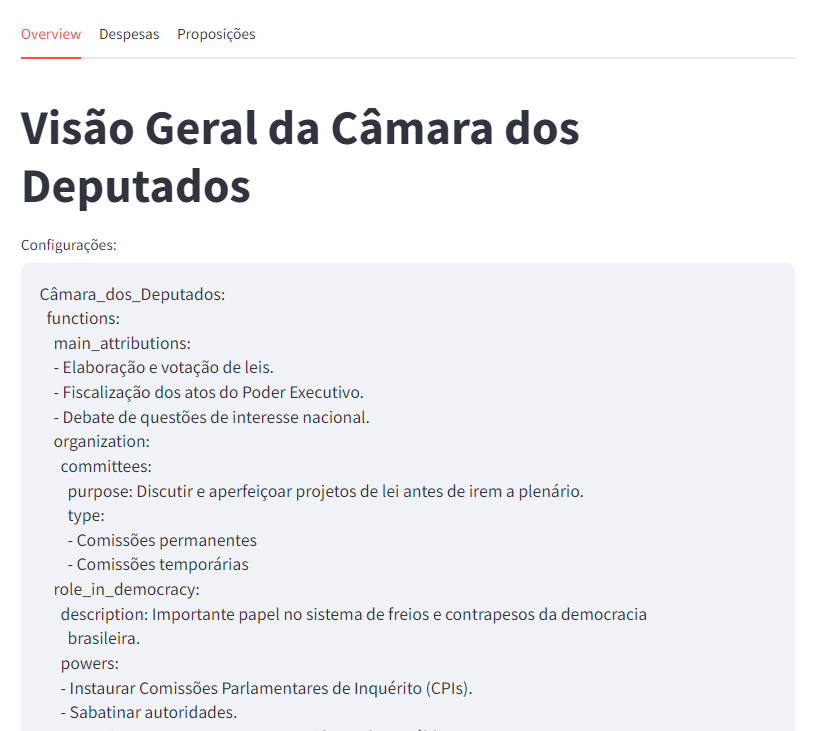

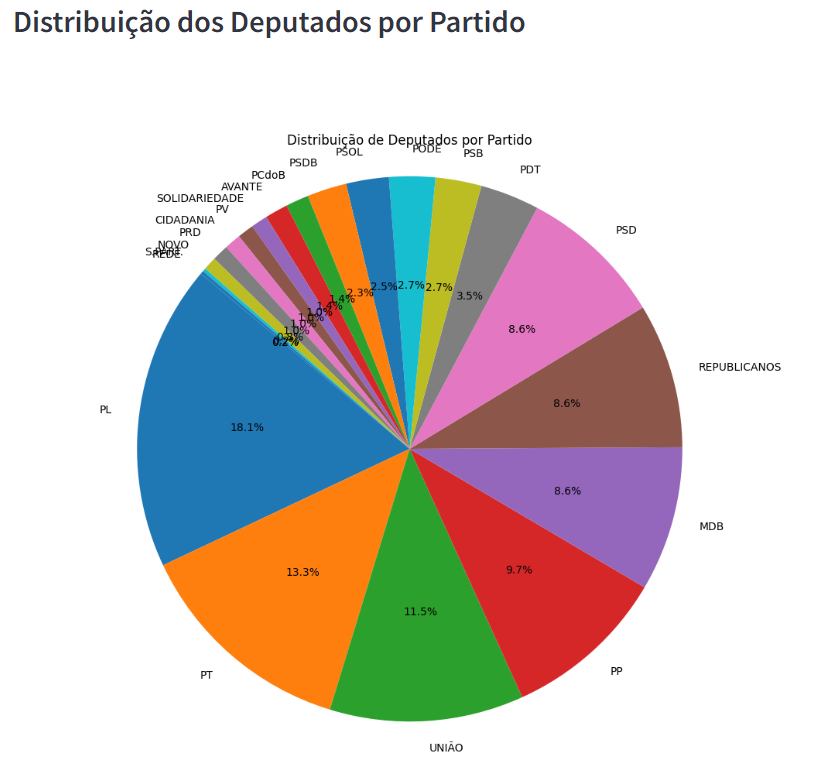

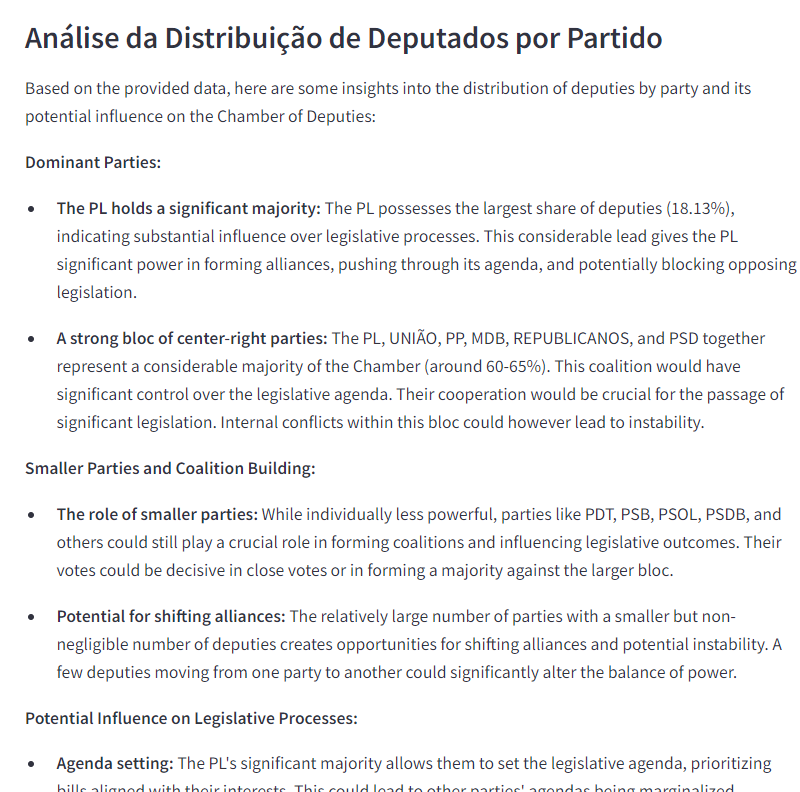

## Exercício 7 Dashboards com Batch-prompting

Utilize a técnica de Batch-prompting para escrever o código streamlit que preencha as abas Despesas e Proposições do código em dashboard.py. 
O prompt deve descrever com detalhes cada aba para geração de:
   - a. Aba Despesas deve mostrar os insights sobre as despesas dos deputados (data/insights_despesas_deputados.json).
   - b. Aba Despesas deve conter um st.selectbox para seleção do deputado.
   - c. Aba Despesas deve mostrar gráfico de barras com a série temporal de despesas do deputado selecionado (data/serie_despesas_diárias_deputados.parquet).
   - d. O painel deve mostrar uma tabela com os dados das proposições (data/proposicoes_deputados.parquet).
   - e. O painel deve mostrar o resumo das proposições em (data/sumarizacao_proposicoes.json).
   - f. Compare o resultado dos códigos gerados pelas técnicas de Chain-of-Thoughts e Batch-prompting.

<div style="background-color: #f8ffe0; padding: 20px; border-radius: 5px;">

### Resposta
**obs**: O arquivo dashboard.py foi renomeado para dashboardV1.py e dashboardV2.py, para que o resultado deste exercício não sobrescrevesse o resultado do exercício anterior, inviabilizando a reexecução isolada deste trecho de código.

* Os resultados gerados pelo Chain-of-Thoughts tendem a ter uma mudança constante ao rodar novamente o código, alternando entre bibliotecas utilizadas ou até mesmo sobre a forma com que se criavam as abas.
    * Devido ao erro na forma de criação das abas, foi adicionada instrução no primeiro prompt do Chain-of-Thoughts para que ele explicasse o próprio erro. Assim ele parou de criar daquela maneira.
* A execução do Prompt-Chaining é mais direta, menos suscetível à "criatividade" do modelo. Ao rodar novamente o modelo para os mesmos prompts, a resposta sofre pouca ou nenhuma variação, dando maior confiabilidade ao processo.
    * Devido ao tamanho do código gerado nas etapas anteriores, em algumas rodadas o modelo ignorou parte das instruções passadas no último prompt, como a solicitação para remover caracteres indesejados ou a solicitação para Adicionar um título antes do gráfico de despesas.

### Prompt 1 - Importação dos Arquivos Necessários e Exibição

In [7]:
import os
import google.generativeai as genai
from dotenv import load_dotenv

with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\app\dashboardV1.py', 'r') as f:
    script_1 = f.read()

prompt_1 = f"""
Você é um desenvolvedor Python, e analisar o conteúdo do arquivo DASHBOARD.PY, complementando a criação do aplicativo Streamlit com as instruções abaixo:

INSTRUÇÕES GERAIS:
-Responda apenas o código consolidado, sem necessidade de explicações.
-Adicione Docstring com a descrição de cada variável, função e tipagem das colunas de cada dataframe. Não exiba a Docstring no aplicativo.

ADICIONAR NA ABA DESPESAS:
    1.Importar o arquivo 'C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/insights_despesas_deputados.json' e exibir seu conteúdo:
        1.1.Adicionar o título 'Insights sobre Despesas dos Deputados'.
        1.2.O arquivo é uma lista de dicionários com os seguintes campos em cada dicionário [analysis_title (String), insight (f-string), highest_spending_categories (f-string:Campo opcional)].
        1.3.Em cada valor do Json devem ser removidas aspas, barras e cifrões.
        1.4.Cada dicionário deve ser exibido separadamente.
    2.Importar o arquivo 'C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/serie_despesas_diárias_deputados.parquet' e adicionar a um dataframe, porém não o exiba no aplicativo.
        2.1.O arquivo possui as coluas [name (string), date (string), expense_type (string), net_value (float64)].

ADICIONAR NA ABA PROPOSIÇÕES:
    2.Importar o arquivo 'C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/sumarizacao_proposicoes' e exibir seu conteúdo.
        2.1.Dê o título de 'Resumo das Proposições em Tramitação'
        2.2.Definir o encoding como UTF-8.
        2.3.Cada linha deve ser exibida separadamente e formatadas como markdown.
    5.Responda apenas o código consolidado, sem necessidade de explicações. 

CONTEÚDO DO ARQUIVO DASHBOARD.PY:

{script_1}

"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_1)
response_1 = response.text.replace("```python\n",'').replace("\n```",'')
print(response_1)


import streamlit as st
import yaml
from PIL import Image
import json
import pandas as pd

st.set_page_config(page_title="Portal de Governança da Câmara", page_icon=":bar_chart:")

tabs = st.tabs(["Overview", "Despesas", "Proposições"])

with tabs[0]:
    st.title("Portal de Governança da Câmara")
    st.write("Este aplicativo visa facilitar a governança da Câmara de Deputados, permitindo o acompanhamento dos políticos com mandatos vigentes, suas despesas e propostas.")

    st.title("Visão Geral da Câmara dos Deputados")
    try:
        with open('C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/config.yaml', 'r', encoding='utf-8') as file:
            yaml_data = yaml.safe_load(file)
            yaml_string = yaml.dump(yaml_data, allow_unicode=True)
            st.text_area("Configurações", yaml_string, height=500)
    except FileNotFoundError:
        st.error("Arquivo config.yaml não encontrado.")
    except yaml.YAMLError as e:
        st.error(f"Erro ao carregar o arqui

### Prompt 2 - Criação do Filtro e Gráfico

In [ ]:
prompt_2 = f"""

Você é um desenvolvedor Python, e analisar o conteúdo do arquivo DASHBOARD.PY, complementando a criação do aplicativo Streamlit com as instruções abaixo:

INSTRUÇÕES GERAIS:
-Responda apenas o código consolidado, sem necessidade de explicações.
-Adicione Docstring com a descrição de cada variável, função e tipagem das colunas de cada dataframe.

ADICIONAR NA ABA DESPESAS:
    1.Adicionar um st.selectbox para seleção de um deputado:
        1.1.Adicione o título 'Consultar histórico de despesas por deputado', antes do selectbox.
        1.2.Os valores do selectbox devem ser os nomes (name) dos deputados, contidos no arquivo "serie_despesas_diárias_deputados.parquet".
        1.3.O selectbox deve filtrar o dataframe que contem os dados do arquivo "serie_despesas_diárias_deputados.parquet", através da coluna "name".
    2.Adicionar um gráfico de barras com a soma das despesas em uma série temporal para o deputado selecionado no selectbox:
        2.1.O gráfico deve ter o título 'Despesas por Tipo de Despesa'.
        2.2.O eixo x deve conter o campo 'date' e ter o título 'Data da Despesa'.
        2.3.O eixo y deve conter o campo 'net_value' e ter o título 'Valor Total das Despesas'.

CONTEÚDO DO ARQUIVO DASHBOARD.PY:

{response_1}

"""

load_dotenv()
genai.configure(api_key=os.getenv('GEMINI_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_2)
response_2 = response.text.replace("```python\n",'').replace("\n```",'')
print(response_2)

import streamlit as st
import yaml
from PIL import Image
import json
import pandas as pd
import plotly.express as px

st.set_page_config(page_title="Portal de Governança da Câmara", page_icon=":bar_chart:")

tabs = st.tabs(["Overview", "Despesas", "Proposições"])

with tabs[0]:
    st.title("Portal de Governança da Câmara")
    st.write("Este aplicativo visa facilitar a governança da Câmara de Deputados, permitindo o acompanhamento dos políticos com mandatos vigentes, suas despesas e propostas.")

    st.title("Visão Geral da Câmara dos Deputados")
    try:
        with open('C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/config.yaml', 'r', encoding='utf-8') as file:
            yaml_data = yaml.safe_load(file)
            yaml_string = yaml.dump(yaml_data, allow_unicode=True)
            st.text_area("Configurações", yaml_string, height=500)
    except FileNotFoundError:
        st.error("Arquivo config.yaml não encontrado.")
    except yaml.YAMLError as e:
        st.erro

In [11]:
with open(r'C:\Users\RodrigoPintoMesquita\Documents\GitHub\DR4_AT\app\dashboardV2.py', 'w') as f:
    f.write(response_2)

# Prints do Aplicativo Gerado

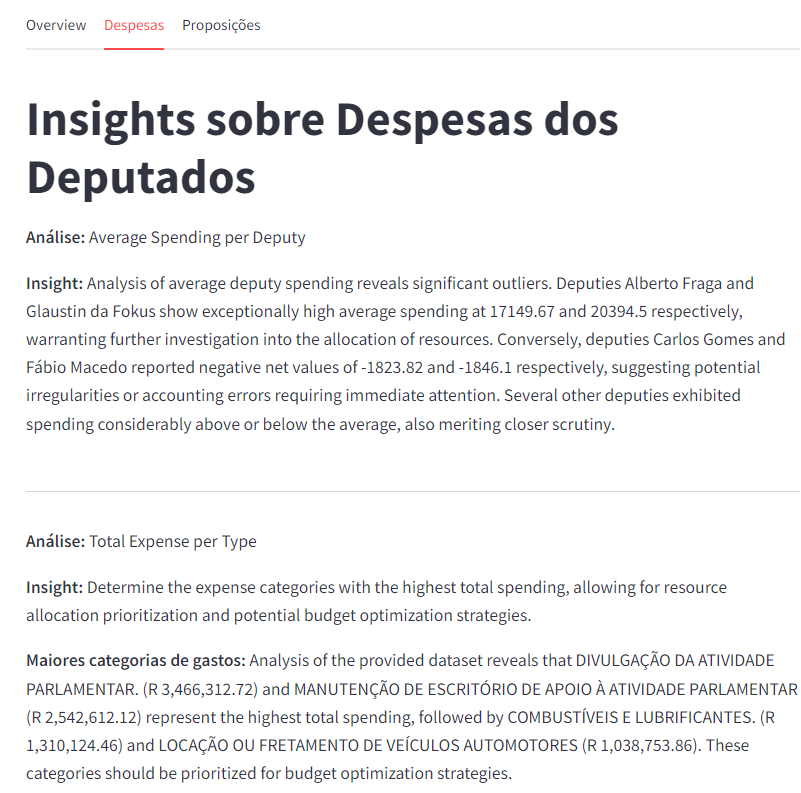

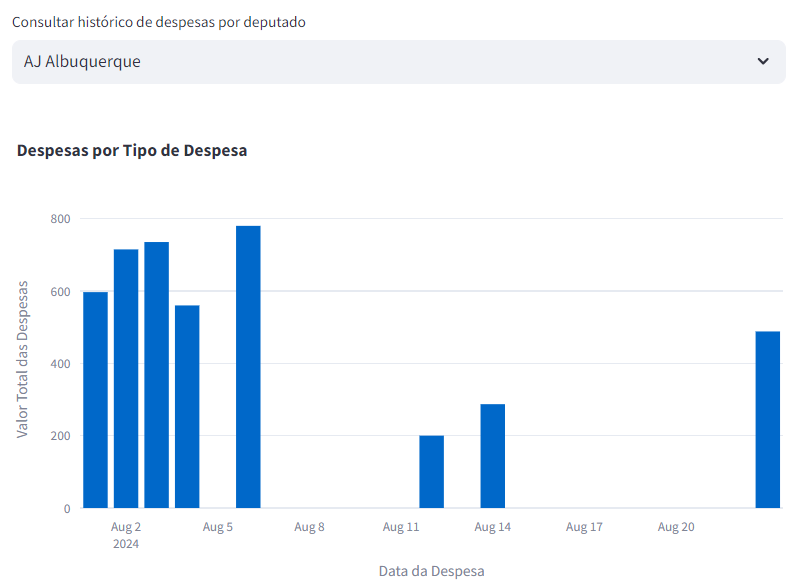

## Exercício 8 Assistente online com base vetorial

Adicione ao código da aba Proposições uma interface para chat com um assistente virtual especialista em câmara dos deputados. 

As informações coletadas dos deputados, despesas e proposições (e suas sumarizações) devem ser vetorizadas usando o modelo "neuralmind/bert-base-portuguese-cased" para armazenamento na base vetorial FAISS. 

O prompt do sistema para o assistente virtual deve ser feito com a técnica Self-Ask:
   - a. Explique como a técnica de self-ask pode ser utilizada nesse contexto.
   - b. Avalie o resultado do modelo para as seguintes perguntas:
      - I. Qual é o partido político com mais deputados na câmara?
      - II. Qual é o deputado com mais despesas na câmara?
      - III. Qual é o tipo de despesa mais declarada pelos deputados da câmara?
      - IV. Quais são as informações mais relevantes sobre as proposições que falam de Economia?
      - V. Quais são as informações mais relevantes sobre as proposições que falam de 'Ciência, Tecnologia e Inovação'?

In [ ]:
# Instale as bibliotecas necessárias, caso ainda não as tenha
# !pip install faiss-cpu sentence-transformers

import faiss
from sentence_transformers import SentenceTransformer
import numpy as np


##########Transformar a minha base em uma lista de strings######################
# Lista de strings que queremos indexar
texts = [
    "Eu adoro aprender sobre inteligência artificial.",
    "Faiss é uma ótima ferramenta para buscas vetoriais.",
    "Python é uma linguagem de programação versátil.",
    "Machine learning está revolucionando várias indústrias.",
    "Deep learning é uma área fascinante da IA."
]

model_name = 'neuralmind/bert-base-portuguese-cased'
llm_model_dir = 'C:/Users/RodrigoPintoMesquita/Documents/GitHub/DR4_AT/data/bertimbau/'
embedding_model = SentenceTransformer(
    model_name, 
    cache_folder=llm_model_dir, 
    device='cpu'
)

embeddings = embedding_model.encode(texts)
embeddings = np.array(embeddings).astype("float32")

d = embeddings.shape[1]  
index = faiss.IndexFlatL2(d) 

index.add(embeddings)

print("Número de vetores no índice:", index.ntotal)



In [ ]:
######### REALIZAR A BUSCA NO ÍNDICE
#############AJUSTAR ESSE PONTO PARA RECEBER O PROMPT COMO INPU DE BUSCA######################
query = "Qual é a utilidade do deep learning?"
query_embedding = embedding_model.encode([query]).astype("float32")

k = 2  # número de resultados mais próximos
distances, indices = index.search(query_embedding, k)

for i in range(k):
    print(f"Texto mais próximo {i+1}: {texts[indices[0][i]]} (distância: {distances[0][i]})")

## Exercício 9 Geração de Imagens com Prompts

Utilizando as informações sumarizadas das proposições dos deputados, vamos gerar prompts que possam fazer alusão aos temas e o que está sendo proposto. 
Use o google Colab para gerar imagens com o modelo "CompVis/stable-diffusion-v1-4" para duas proposições de sua escolha. 
Com essas informações, responda:
   - a. Descreva o funcionamento dos modelo de imagem, segundo suas arquiteturas, limitações e vantagens:
      - I. Stable Diffusion
      - II. DALL-e
      - III. MidJourney
   - b. Utilize diferentes técnicas de “Estilo Visual” e “Composição”, além de exemplos com negative prompting, para gerar 3 versões de imagem para cada proposição e avalie...
